# Multiple Linear Regression Model for Weight estimation from measurements of the fish

The aim of this study is to estimate weight of the fish indivuduals from their measurements through using linear regression model.

This study can be improved to use in fish farms. Individual fish swimming in front of the camera can be measured from the video image and the weight of the fish can be estimated through the linear regression model.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Reading the data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine-learning/fish-weight-estimation-multiple-linear-regression/Fish.csv')
df = data.copy()
# df.head()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515
92,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240
121,Perch,1015.0,37.0,40.0,42.4,12.3808,7.4624
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
25,Bream,725.0,31.8,35.0,40.9,16.3600,6.0532
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
33,Bream,975.0,37.4,41.0,45.9,18.6354,6.7473
110,Perch,556.0,32.0,34.5,36.5,10.2565,6.3875


### Meanings of the Columns:

1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm


Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.

We will use independent variables (measurements of the fish) to estimate dependent variable (weight of the fish).

### Changing the Column Names:

In [4]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Data Inspection

In [5]:
df.shape

(159, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   LengthVer  159 non-null    float64
 3   LengthDia  159 non-null    float64
 4   LengthCro  159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df.describe()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Data cleaning

In [8]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Species      0.0
Weight       0.0
LengthVer    0.0
LengthDia    0.0
LengthCro    0.0
Height       0.0
Width        0.0
dtype: float64

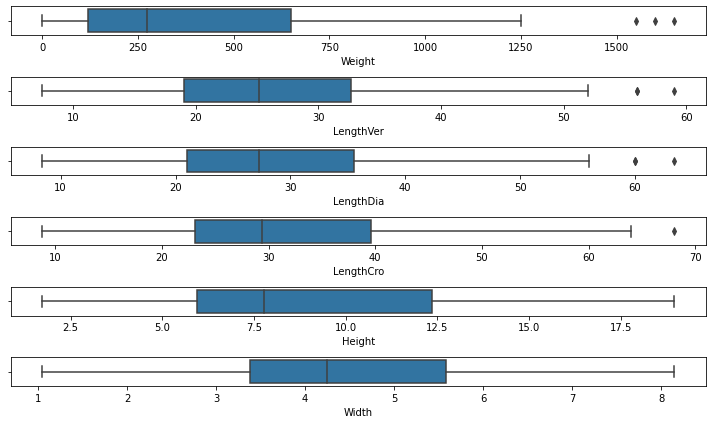

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(6, figsize = (10,6))
plt1 = sns.boxplot(df['Weight'], ax = axs[0])
plt2 = sns.boxplot(df['LengthVer'], ax = axs[1])
plt3 = sns.boxplot(df['LengthDia'], ax = axs[2])
plt4 = sns.boxplot(df['LengthCro'], ax = axs[3])
plt5 = sns.boxplot(df['Height'], ax = axs[4])
plt6 = sns.boxplot(df['Width'], ax = axs[5])
plt.tight_layout()

In [10]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [11]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [12]:
dflv = df['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

In [13]:
dfdia = df['LengthDia']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

In [14]:
dfcro = df['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCro, dtype: float64

In [15]:
# Outliers of the Dataset
df[142:145]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [16]:
# remove the outliers
df1 = df.drop([142,143,144])

In [17]:
df1.describe()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


### Different Species and Their Counts:

In [18]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


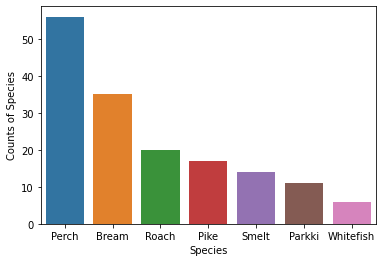

In [19]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

### Correlation of the Variables:

In [20]:
df.corr()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
LengthVer,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
LengthDia,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
LengthCro,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


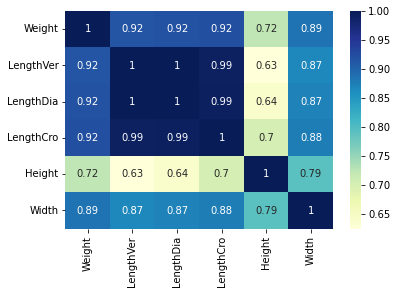

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

## Model build

In [22]:
# Dependant (Target) Variable:
y = df1['Weight']
# Independant Variables:
X = df1.iloc[:,2:7]
# X.head()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times LengthVer + m_2 \times LengthDia + m_3 \times LengthCro + m_4 \times Height + m_5 \times Width$

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [24]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -441.00887253881797
Model coefficients:  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


## Model Evaluation

In [26]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

### Residual analysis

Distribution of the error terms

In [27]:
res = (y_train - y_train_pred)
res

66     -62.904528
33      89.081086
141    307.667259
59      97.949630
127     57.402978
          ...    
133   -107.617186
137    -91.527838
72     221.860746
140    134.867176
37      -5.519582
Name: Weight, Length: 124, dtype: float64

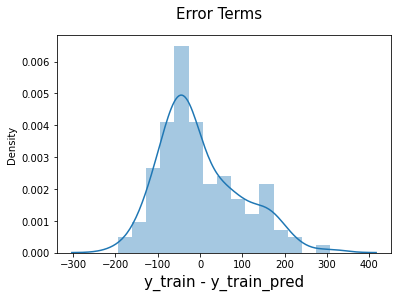

In [28]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

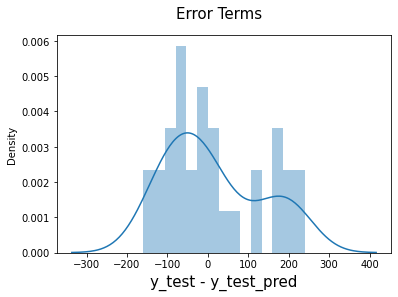

In [29]:
res_test = (y_test - y_test_pred)
fig = plt.figure()
sns.distplot(res_test, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.show()

In [30]:
# calculate error matrix, r2, adj r2 on train data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

print('Train data stats: ')

r_sq_train = r2_score(y_train, y_train_pred)
print('R-squared is : ', r_sq_train)

n = len(y)
p = 3
adj_R2_train = 1-((1-r_sq_train)*(n-1)/(n-p-1))
print('Adjusted R square is :', adj_R2_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('root mean square error is : ', rmse_train)

mse_train = mean_squared_error(y_train, y_train_pred)
print('mean square error is : ', mse_train)

mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
print('mean absolute error is : ', mae_train)

Train data stats: 
R-squared is :  0.9116039087262157
Adjusted R square is : 0.9098592490300226
root mean square error is :  94.25225803412444
mean square error is :  8883.488144531175
mean absolute error is :  76.12927494933598


In [31]:
print('Test data stats: ')

r_sq_test = r2_score(y_test, y_test_pred)
print('R-squared is : ', r_sq_test)

n = len(y)
p = 3
adj_R2_test = 1-((1-r_sq_test)*(n-1)/(n-p-1))
print('Adjusted R square is :', adj_R2_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('root mean square error is : ', rmse_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print('mean square error is : ', mse_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
print('mean absolute error is : ', mae_test)

Test data stats: 
R-squared is :  0.8671964388742469
Adjusted R square is : 0.8645753159572913
root mean square error is :  116.63968064306823
mean square error is :  13604.815100516946
mean absolute error is :  94.90166874346494


if we change random_state, our train and test samples will be different and our model's score will be different. In order to eliminate this change we will use cross validation

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.81965553 0.91733889 0.90970988 0.96003833 0.93655595 0.86878097
 0.91955783 0.8518532  0.84071059 0.81121078]


There are 10 different versions of r2 scores using our model (reg). If we get the average of this we can achieve cross validated r2 score of our training model

In [33]:
cross_val_score_train.mean()

0.8835411966576625

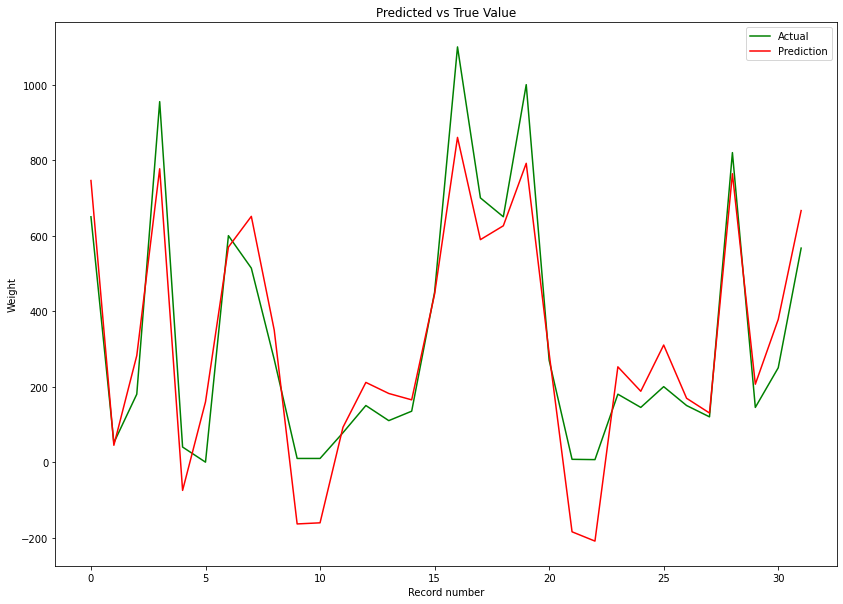

In [35]:
plt.figure(figsize=(14,10))
plt.plot(range(len(y_test)),y_test, color = "green")
plt.plot(range(len(y_test)),y_test_pred, color = "red")
plt.legend(["Actual","Prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel("Weight")
plt.show()